In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('MLB-2020-DFS-Dataset.xlsx', usecols= ['PLAYER', 'OPPONENT', 'VENUE (R/H)', 
                                                          'DRAFTKINGS Actual Points', 'DATE'])
df.head()

,DATE,PLAYER,OPPONENT,VENUE (R/H),DRAFTKINGS Actual Points
0,2020-07-23,Mike Yastrzemski,Los Angeles Dodgers,Road,6.0
1,2020-07-23,Wilmer Flores,Los Angeles Dodgers,Road,3.0
2,2020-07-23,Pablo Sandoval,Los Angeles Dodgers,Road,5.0
3,2020-07-23,Alex Dickerson,Los Angeles Dodgers,Road,6.0
4,2020-07-23,Hunter Pence,Los Angeles Dodgers,Road,0.0


In [3]:
df['DATE'].unique()

array(['2020-07-23T00:00:00.000000000', '2020-07-24T00:00:00.000000000',
       '2020-07-25T00:00:00.000000000', '2020-07-26T00:00:00.000000000',
       '2020-07-27T00:00:00.000000000', '2020-07-28T00:00:00.000000000',
       '2020-07-29T00:00:00.000000000', '2020-07-30T00:00:00.000000000',
       '2020-07-31T00:00:00.000000000', '2020-08-01T00:00:00.000000000',
       '2020-08-02T00:00:00.000000000', '2020-08-03T00:00:00.000000000',
       '2020-08-04T00:00:00.000000000', '2020-08-05T00:00:00.000000000',
       '2020-08-06T00:00:00.000000000', '2020-08-07T00:00:00.000000000',
       '2020-08-08T00:00:00.000000000', '2020-08-09T00:00:00.000000000',
       '2020-08-10T00:00:00.000000000', '2020-08-11T00:00:00.000000000',
       '2020-08-12T00:00:00.000000000', '2020-08-13T00:00:00.000000000',
       '2020-08-14T00:00:00.000000000', '2020-08-15T00:00:00.000000000',
       '2020-08-16T00:00:00.000000000', '2020-08-17T00:00:00.000000000',
       '2020-08-18T00:00:00.000000000', '2020-08-19

In [4]:
import datetime

In [5]:
t= pd.to_datetime(df['DATE'].unique()) 
timestring = t.strftime('%m/%d/%Y')
dates = timestring.tolist()

In [6]:
dailyStats = {}
count = 0
for date in df['DATE'].unique():
    datedf = df[df['DATE']== date]
    datedf = datedf.reset_index()
    del datedf['index']
    dailyStats[dates[count]] = datedf
    count +=1
dailyStats['07/23/2020'].head()

,DATE,PLAYER,OPPONENT,VENUE (R/H),DRAFTKINGS Actual Points
0,2020-07-23,Mike Yastrzemski,Los Angeles Dodgers,Road,6.0
1,2020-07-23,Wilmer Flores,Los Angeles Dodgers,Road,3.0
2,2020-07-23,Pablo Sandoval,Los Angeles Dodgers,Road,5.0
3,2020-07-23,Alex Dickerson,Los Angeles Dodgers,Road,6.0
4,2020-07-23,Hunter Pence,Los Angeles Dodgers,Road,0.0


In [7]:
import pandas as pd
from pulp import *
import openpyxl
import re

In [8]:
players = pd.read_csv("July26.csv",
                     usecols= ['Name', 'Team', 'Opponent', 'Position', 'DFS ID', 'SS Projection', 
                               'Actual', 'Price', 'dk_85_percentile', 'dk_95_percentile'])

In [9]:
players = players[(players['Name'] != 'Will Smith') & 
          players['Team'] != 'ATL']
players.head()

,Name,Team,Opponent,Position,DFS ID,SS Projection,Actual,Price,dk_85_percentile,dk_95_percentile
0,Zack Greinke,HOU,SEA,P,14838025,21.8929,6.90,10900,35.2500,42.2500
1,Trevor Bauer,CIN,DET,P,14838029,20.3876,41.00,10100,34.5575,41.3025
2,Carlos Carrasco,CLE,KC,P,14838032,19.4398,7.75,8600,33.3500,40.5000
3,Corey Kluber,TEX,COL,P,14838028,16.2113,8.65,10300,30.2500,37.6500
4,Blake Snell,TB,TOR,P,14838026,14.8278,6.45,10700,23.3000,27.9500


In [10]:
merged = pd.merge(left=dailyStats['07/26/2020'], right=players, how='left', left_on='PLAYER', right_on='Name')
merged.head() 

,DATE,PLAYER,OPPONENT,VENUE (R/H),DRAFTKINGS Actual Points,Name,Team,Opponent,Position,DFS ID,SS Projection,Actual,Price,dk_85_percentile,dk_95_percentile
0,2020-07-26,Austin Hays,Boston Red Sox,Road,4.0,Austin Hays,BAL,BOS,OF,14838095.0,9.2466,20.0,4300.0,18.0,25.0
1,2020-07-26,Anthony Santander,Boston Red Sox,Road,20.0,Anthony Santander,BAL,BOS,OF,14838123.0,8.9490,7.0,4100.0,17.0,24.0
2,2020-07-26,Jose Iglesias,Boston Red Sox,Road,20.0,Jose Iglesias,BAL,BOS,SS,14838339.0,8.0948,14.0,3200.0,15.0,21.0
3,2020-07-26,Rio Ruiz,Boston Red Sox,Road,18.0,Rio Ruiz,BAL,BOS,3B,14838262.0,8.1780,0.0,3500.0,16.0,23.0
4,2020-07-26,Hanser Alberto,Boston Red Sox,Road,10.0,Hanser Alberto,BAL,BOS,2B,14838221.0,8.2444,23.0,3600.0,15.0,21.0


In [11]:
players = players[players['dk_95_percentile'].notna()]
merged = merged[merged['dk_95_percentile'].notna()].sort_values('dk_95_percentile').drop_duplicates(subset='PLAYER', keep='first')

wb = openpyxl.Workbook()
ws = wb.active


availables = merged.groupby(["Position", "Name", "dk_95_percentile", "Price", 'Team']).agg('count')
availables = availables.reset_index()

salaries = {}
points = {}
teams = {}

for pos in availables.Position.unique():
    available_pos = availables[availables.Position == pos]
    salary = list(available_pos[['Name', 'Price']].set_index("Name").to_dict().values())[0]
    point = list(available_pos[['Name', 'dk_95_percentile']].set_index("Name").to_dict().values())[0]
    
    salaries[pos] = salary
    points[pos] = point
    
    
pos_num_available = {
    "P": 2,
    "C": 1,
    "1B": 1,
    "2B": 1,
    "3B": 1,
    "SS": 1,
    "OF": 3,
                    }

salary_cap = 50000

_vars = {k: LpVariable.dict(k, v, cat='Binary') for k, v in points.items()}
new_vars = _vars

#creates a dictionary where the keys are the LPvariables (e.g. 'P_Aaron_Nola') and the values are all 0
listDict = []
newDict = {}
for k, v in _vars.items():
    listDict.append(v)

for x in listDict:
    for v in x.values():
        newDict[str(v)] = 0 
        
#this function takes in an LPVariable (e.g. 'P_Aaron_Nola') and returns a list of player's position and name (e.g. ['P', 'Aaron Nola'])
def get_key(val, _vars): 
    newList=[]
    for key, value in _vars.items(): 
        for k, v in value.items():
            #print(v)
            if val == str(v): 
                newList = [key,k]
                return newList
            
def summary(prob):
    div = '---------------------------------------\n'
    print("Variables:\n")
    score = str(prob.objective)
    constraints = [str(const) for const in prob.constraints.values()]
    for v in prob.variables():
        #in objective function, replaces name with assigned binary value (either 1 or 0)
        score = score.replace(v.name, str(v.varValue))
        #in constraints, replaces name with assigned binary value (either 1 or 0)
        constraints = [const.replace(v.name, str(v.varValue)) for const in constraints]
        if v.varValue != 0:
            print(v.name, "=", v.varValue)
    #print(div)
    #print("Constraints:")
    for constraint in constraints:
        constraint_pretty = " + ".join(re.findall("[0-9\.]*\*1.0", constraint))
        #if constraint_pretty != "":
            #print("{} = {}".format(constraint_pretty, eval(constraint_pretty)))
    print(div)
    print("Score:")
    score_pretty = " + ".join(re.findall("[0-9\.]+\*1.0", score))
    print("{} = {}".format(score_pretty, eval(score)))
    return score 

def playerList(prob):
    players= []
    for v in prob.variables():
        if v.varValue != 0:
            players.append(v.name)
    return players

playerLineups = []

for lineup in range(1,151):
    
    
    prob = LpProblem("Fantasy", LpMaximize)
    rewards = []
    costs = []
    position_constraints = []
    
    for k, v in _vars.items():
        costs += lpSum([salaries[k][i] * _vars[k][i] for i in v])
        rewards += lpSum([points[k][i] * _vars[k][i] for i in v])
        prob += lpSum([_vars[k][i] for i in v]) == pos_num_available[k]
        
    prob += lpSum(rewards)
    prob += lpSum(costs) <= salary_cap
    if not lineup == 1:
        prob += (lpSum(rewards) <= total_score-0.01)
    prob.solve()
    
    playerLineups.append(playerList(prob))
    
    #this loop counts how many times each player appears in a lineup.  This is the same dictionary created earlier where are the values are 0.  If a player is on a lineup, that value will increase by 1
    for v in prob.variables():
        if v.varValue != 0:
            newDict[v.name] += 1
    
    #this loop removes players from the _vars dictionary (and thus removes them from the model) once they have appeared on a set number of lineups
    for k, v in newDict.items():
        for value in new_vars.values():
            for i in value.copy():
                if str(value[i])==k:
                    if v >= 40:
                        pos = get_key(k, _vars)[0]
                        name = get_key(k, _vars)[1]
                        del _vars[pos][name]
    
    score= str(prob.objective)
    constraints = [str(const) for const in prob.constraints.values()]
    colnum = 1
    
    for v in prob.variables():
        score = score.replace(v.name, str(v.varValue))
        if v.varValue !=0:
            ws.cell(row=lineup, column=colnum).value = v.name
            colnum +=1
    
    total_score = eval(score)
    ws.cell(row=lineup, column=colnum).value = total_score
    print(lineup, total_score)
    #summary(prob)

#wb.save("Lineups20200807_12111.xlsx")

1 296.1
2 295.8025
3 295.1525
4 295.1
5 294.8025
6 294.75
7 294.35
8 294.1525
9 294.1
10 293.9525
11 293.8025
12 293.75
13 293.35
14 293.1525
15 293.1
16 292.9525
17 292.8525
18 292.8025
19 292.755
20 292.7025
21 292.6525
22 292.5525
23 292.35
24 292.2025
25 292.1525
26 292.1
27 292.0025
28 291.9525
29 291.9
30 291.8525
31 291.8025
32 291.755
33 291.7025
34 291.6525
35 291.6
36 291.5525
37 291.5
38 291.40000000000003
39 291.35
40 291.2025
41 291.1
42 287.8025
43 287.75
44 286.8025
45 286.75
46 286.1525
47 286.1
48 285.9525
49 285.8525
50 285.8025
51 285.75
52 285.5525
53 284.8525
54 284.8025
55 284.75
56 283.8525
57 283.8025
58 283.75
59 283.5525
60 283.35
61 283.1525
62 283.1
63 282.8525
64 282.8025
65 282.75
66 282.6025
67 282.5525
68 281.8525
69 281.8025
70 281.75
71 281.5525
72 280.6025
73 280.5525
74 280.1
75 279.1
76 278.15
77 278.1
78 277.7025
79 277.15
80 277.1
81 276.9
82 276.7525
83 276.7025
84 276.65
85 275.5
86 274.5
87 274.3025
88 274.25
89 274.1
90 273.55
91 273.5
92 273.

In [12]:
def lineupDF(players):
    df = pd.DataFrame(players, columns = ['LPName'])
    return df

lineups = []
for team in playerLineups:
    lineups.append(lineupDF(team))

lineups[0]

,LPName
0,1B_Logan_Morrison
1,2B_Keston_Hiura
2,3B_Josh_Donaldson
3,C_Salvador_Perez
4,OF_Christian_Yelich
5,OF_J.D._Martinez
6,OF_Nelson_Cruz
7,P_Thomas_Hatch
8,P_Zack_Greinke
9,SS_Xander_Bogaerts


In [13]:
def fixName(string):
    my_new_string = re.sub('_', ' ', string)
    count = 0
    for char in my_new_string:
        if char == " ":
            my_new_string = my_new_string[count+1:]
            break
        count +=1
    return my_new_string

def addRealNames(lineup):
    lineup['Name'] = lineup.apply(lambda row: fixName(row['LPName']), axis=1)
    return lineup

In [14]:
lineups2 = []
for lineup in lineups:
    lineups2.append(addRealNames(lineup))
lineups2[0]

,LPName,Name
0,1B_Logan_Morrison,Logan Morrison
1,2B_Keston_Hiura,Keston Hiura
2,3B_Josh_Donaldson,Josh Donaldson
3,C_Salvador_Perez,Salvador Perez
4,OF_Christian_Yelich,Christian Yelich
5,OF_J.D._Martinez,J.D. Martinez
6,OF_Nelson_Cruz,Nelson Cruz
7,P_Thomas_Hatch,Thomas Hatch
8,P_Zack_Greinke,Zack Greinke
9,SS_Xander_Bogaerts,Xander Bogaerts


In [15]:
def joinProjectionsActuals(lineup, players):
    players['Name'] = players['Name'].astype(str)
    newMerged = pd.merge(left=lineup, right=merged, how='left', left_on='Name', right_on='Name')
    return newMerged

lineups3 = []

for lineup in lineups2:
    lineups3.append(joinProjectionsActuals(lineup,players))

lineups3[1]

,LPName,Name,DATE,PLAYER,OPPONENT,VENUE (R/H),DRAFTKINGS Actual Points,Team,Opponent,Position,DFS ID,SS Projection,Actual,Price,dk_85_percentile,dk_95_percentile
0,1B_Logan_Morrison,Logan Morrison,2020-07-26,Logan Morrison,Chicago Cubs,Road,0.00,MIL,CHC,1B,14838285.0,9.4186,0.00,3400.0,18.0000,26.0000
1,2B_Marwin_Gonzalez,Marwin Gonzalez,2020-07-26,Marwin Gonzalez,Chicago White Sox,Road,17.00,MIN,CWS,2B,14838336.0,8.1920,9.00,3200.0,16.0000,23.0000
2,3B_Josh_Donaldson,Josh Donaldson,2020-07-26,Josh Donaldson,Chicago White Sox,Road,8.00,MIN,CWS,3B,14838109.0,10.9238,4.00,4200.0,20.0000,28.0000
3,C_Salvador_Perez,Salvador Perez,2020-07-26,Salvador Perez,Cleveland Indians,Road,5.00,KC,CLE,C,14838276.0,7.8104,39.00,3400.0,16.0000,24.0000
4,OF_J.D._Martinez,J.D. Martinez,2020-07-26,J.D. Martinez,Baltimore Orioles,Home,0.00,BOS,BAL,OF,14838053.0,12.7660,9.00,5000.0,23.0000,32.0000
5,OF_Max_Kepler,Max Kepler,2020-07-26,Max Kepler,Chicago White Sox,Road,0.00,MIN,CWS,OF,14838117.0,10.6298,0.00,4100.0,20.0000,27.0000
6,OF_Nelson_Cruz,Nelson Cruz,2020-07-26,Nelson Cruz,Chicago White Sox,Road,52.00,MIN,CWS,OF,14838082.0,11.1154,9.00,4500.0,21.0000,30.0000
7,P_Carlos_Carrasco,Carlos Carrasco,2020-07-26,Carlos Carrasco,Kansas City Royals,Home,29.90,CLE,KC,P,14838032.0,19.4398,7.75,8600.0,33.3500,40.5000
8,P_Trevor_Bauer,Trevor Bauer,2020-07-26,Trevor Bauer,Detroit Tigers,Home,36.45,CIN,DET,P,14838029.0,20.3876,41.00,10100.0,34.5575,41.3025
9,SS_Didi_Gregorius,Didi Gregorius,2020-07-26,Didi Gregorius,Miami Marlins,Home,5.00,PHI,MIA,SS,14838243.0,8.8252,21.00,3500.0,17.0000,24.0000


In [16]:
lineupScores = []
for lineup in lineups3:
    lineupScores.append(lineup.sum(axis = 0, skipna = True)['DRAFTKINGS Actual Points'])
lineupScores

[80.9,
 153.35000000000002,
 128.45,
 75.9,
 162.35000000000002,
 116.80000000000001,
 121.9,
 115.45,
 72.9,
 112.05000000000001,
 138.35000000000002,
 103.80000000000001,
 108.9,
 131.45,
 86.9,
 107.05000000000001,
 147.35000000000002,
 113.35000000000001,
 116.60000000000001,
 82.05000000000001,
 134.75,
 142.35,
 123.9,
 117.45,
 117.45,
 87.9,
 114.05000000000001,
 112.05000000000001,
 151.15,
 155.35000000000002,
 174.35000000000002,
 133.6,
 94.05000000000001,
 134.75,
 113.2,
 125.35000000000001,
 95.65,
 123.9,
 107.9,
 132.45,
 93.9,
 113.35000000000001,
 78.80000000000001,
 101.35,
 80.80000000000001,
 86.45,
 29.9,
 80.05000000000001,
 117.35000000000001,
 133.35000000000002,
 101.80000000000001,
 90.35000000000001,
 110.35000000000001,
 106.35,
 70.8,
 127.35000000000001,
 95.35,
 85.80000000000001,
 92.35000000000001,
 71.9,
 78.45,
 55.9,
 147.35000000000002,
 127.35000000000001,
 110.80000000000001,
 80.35000000000001,
 94.35000000000001,
 115.35000000000001,
 128.3500

In [17]:
for i in range (0, len(lineupScores)):
    print('Lineup ' + str(i) + ": " + str(lineupScores[i]))
    print('\n')

Lineup 0: 80.9


Lineup 1: 153.35000000000002


Lineup 2: 128.45


Lineup 3: 75.9


Lineup 4: 162.35000000000002


Lineup 5: 116.80000000000001


Lineup 6: 121.9


Lineup 7: 115.45


Lineup 8: 72.9


Lineup 9: 112.05000000000001


Lineup 10: 138.35000000000002


Lineup 11: 103.80000000000001


Lineup 12: 108.9


Lineup 13: 131.45


Lineup 14: 86.9


Lineup 15: 107.05000000000001


Lineup 16: 147.35000000000002


Lineup 17: 113.35000000000001


Lineup 18: 116.60000000000001


Lineup 19: 82.05000000000001


Lineup 20: 134.75


Lineup 21: 142.35


Lineup 22: 123.9


Lineup 23: 117.45


Lineup 24: 117.45


Lineup 25: 87.9


Lineup 26: 114.05000000000001


Lineup 27: 112.05000000000001


Lineup 28: 151.15


Lineup 29: 155.35000000000002


Lineup 30: 174.35000000000002


Lineup 31: 133.6


Lineup 32: 94.05000000000001


Lineup 33: 134.75


Lineup 34: 113.2


Lineup 35: 125.35000000000001


Lineup 36: 95.65


Lineup 37: 123.9


Lineup 38: 107.9


Lineup 39: 132.45


Lineup 40: 93.9


Lineup 4

In [18]:
lineups3[136]

,LPName,Name,DATE,PLAYER,OPPONENT,VENUE (R/H),DRAFTKINGS Actual Points,Team,Opponent,Position,DFS ID,SS Projection,Actual,Price,dk_85_percentile,dk_95_percentile
0,1B_Jay_Bruce,Jay Bruce,2020-07-26,Jay Bruce,Miami Marlins,Home,17.00,PHI,MIA,1B,14838225.0,8.8812,0.00,3600.0,18.0,25.00
1,2B_Gleyber_Torres,Gleyber Torres,2020-07-26,Gleyber Torres,Washington Nationals,Road,22.00,NYY,WAS,2B,14838068.0,8.8888,4.00,4800.0,18.0,25.00
2,3B_Rafael_Devers,Rafael Devers,2020-07-26,Rafael Devers,Baltimore Orioles,Home,7.00,BOS,BAL,3B,14838050.0,10.2782,11.00,5200.0,19.0,27.00
3,C_J.T._Realmuto,J.T. Realmuto,2020-07-26,J.T. Realmuto,Miami Marlins,Home,3.00,PHI,MIA,C,14838074.0,8.8712,5.00,4800.0,17.0,24.00
4,OF_Adam_Haseley,Adam Haseley,2020-07-26,Adam Haseley,Miami Marlins,Home,22.00,PHI,MIA,OF,14838363.0,8.9966,4.00,3100.0,17.0,24.00
5,OF_Jesse_Winker,Jesse Winker,2020-07-26,Jesse Winker,Detroit Tigers,Home,5.00,CIN,DET,OF,14838248.0,9.6476,16.00,3500.0,18.0,25.00
6,OF_Joey_Gallo,Joey Gallo,2020-07-26,Joey Gallo,Colorado Rockies,Home,16.00,TEX,COL,OF,14838102.0,9.1786,0.00,4300.0,19.0,25.00
7,P_Freddy_Peralta,Freddy Peralta,2020-07-26,Freddy Peralta,Chicago Cubs,Road,1.15,MIL,CHC,P,14838033.0,13.1117,1.65,8200.0,27.4,34.25
8,P_Kenta_Maeda,Kenta Maeda,2020-07-26,Kenta Maeda,Chicago White Sox,Road,20.25,MIN,CWS,P,14838031.0,14.0041,27.10,9000.0,28.1,35.40
9,SS_Didi_Gregorius,Didi Gregorius,2020-07-26,Didi Gregorius,Miami Marlins,Home,5.00,PHI,MIA,SS,14838243.0,8.8252,21.00,3500.0,17.0,24.00


In [19]:
pd.Series(lineupScores).max()

174.35000000000002

(array([ 1.,  3., 12., 26., 38., 34., 19.,  9.,  6.,  2.]),
 array([ 29.9  ,  44.345,  58.79 ,  73.235,  87.68 , 102.125, 116.57 ,
        131.015, 145.46 , 159.905, 174.35 ]),
 <BarContainer object of 10 artists>)

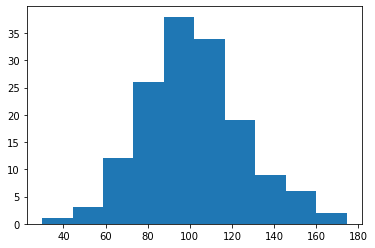

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(lineupScores, 10)

In [21]:
pd.Series(lineupScores).sort_values(ascending=False).head(10)

30     174.35
4      162.35
29     155.35
1      153.35
28     151.15
137    147.90
62     147.35
16     147.35
21     142.35
10     138.35
dtype: float64

In [22]:
pd.Series(lineupScores).sort_values(ascending=False).head(10).tolist()

[174.35000000000002,
 162.35000000000002,
 155.35000000000002,
 153.35000000000002,
 151.15,
 147.9,
 147.35000000000002,
 147.35000000000002,
 142.35,
 138.35000000000002]

In [32]:
lineups3[30]

,LPName,Name,DATE,PLAYER,OPPONENT,VENUE (R/H),DRAFTKINGS Actual Points,Team,Opponent,Position,DFS ID,SS Projection,Actual,Price,dk_85_percentile,dk_95_percentile
0,1B_Logan_Morrison,Logan Morrison,2020-07-26,Logan Morrison,Chicago Cubs,Road,0.00,MIL,CHC,1B,14838285.0,9.4186,0.00,3400.0,18.0000,26.0000
1,2B_Marwin_Gonzalez,Marwin Gonzalez,2020-07-26,Marwin Gonzalez,Chicago White Sox,Road,17.00,MIN,CWS,2B,14838336.0,8.1920,9.00,3200.0,16.0000,23.0000
2,3B_Josh_Donaldson,Josh Donaldson,2020-07-26,Josh Donaldson,Chicago White Sox,Road,8.00,MIN,CWS,3B,14838109.0,10.9238,4.00,4200.0,20.0000,28.0000
3,C_Curt_Casali,Curt Casali,2020-07-26,Curt Casali,Detroit Tigers,Home,2.00,CIN,DET,C,14838473.0,6.9636,0.00,2700.0,14.0000,21.0000
4,OF_J.D._Martinez,J.D. Martinez,2020-07-26,J.D. Martinez,Baltimore Orioles,Home,0.00,BOS,BAL,OF,14838053.0,12.7660,9.00,5000.0,23.0000,32.0000
5,OF_Jake_Cave,Jake Cave,2020-07-26,Jake Cave,Chicago White Sox,Road,22.00,MIN,CWS,OF,14838443.0,8.6612,30.00,2800.0,17.0000,24.0000
6,OF_Nelson_Cruz,Nelson Cruz,2020-07-26,Nelson Cruz,Chicago White Sox,Road,52.00,MIN,CWS,OF,14838082.0,11.1154,9.00,4500.0,21.0000,30.0000
7,P_Carlos_Carrasco,Carlos Carrasco,2020-07-26,Carlos Carrasco,Kansas City Royals,Home,29.90,CLE,KC,P,14838032.0,19.4398,7.75,8600.0,33.3500,40.5000
8,P_Trevor_Bauer,Trevor Bauer,2020-07-26,Trevor Bauer,Detroit Tigers,Home,36.45,CIN,DET,P,14838029.0,20.3876,41.00,10100.0,34.5575,41.3025
9,SS_Xander_Bogaerts,Xander Bogaerts,2020-07-26,Xander Bogaerts,Baltimore Orioles,Home,7.00,BOS,BAL,SS,14838081.0,10.5814,12.00,4600.0,19.0000,26.0000


In [30]:
def checkPos(pos):   
    posCount = 0
    indexList = []
    idx = 0
    for lineup in lineups3:
        if pos == 'OF':
            if lineup.loc[lineup['Position'] == pos].shape[0] > 3:
                posCount += 1
                indexList.append(idx)
        elif pos == 'P':
            if lineup.loc[lineup['Position'] == pos].shape[0] > 2:
                posCount += 1
                indexList.append(idx)
        else:
            if lineup.loc[lineup['Position'] == pos].shape[0] > 1:
                posCount += 1
                indexList.append(idx)
        idx += 1
    print(pos + ': '+ str(posCount))
    return indexList

In [31]:
posList = ['P', '1B', '2B', '3B', 'SS', 'C', 'OF']
posIndex = []

for pos in posList:
    if len(checkPos(pos)) > 0:
        posIndex.append(checkPos(pos))
    else:
        posIndex.append([])

P: 0
1B: 0
2B: 0
3B: 0
SS: 0
C: 0
OF: 0
